#### ASSIGNMENT 3
Tracking a reference trajectory (another vehicle)



The first robot is fed with a predetermined input 
     $$u_{11} = 10 ~m/s ~~~~~~~~\text{velocity}$$  
     $$u_{12} = sin(2 \times \pi \times 0.001 \times t) ~rad/s ~~~~~~~~\text{angular velocity}$$  
     


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lab3 import bot_unicycle_i

fig_size=[0, 0]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

[5, 2, 0.28559933214452665]
[2, -50, 1.0471975511965976]


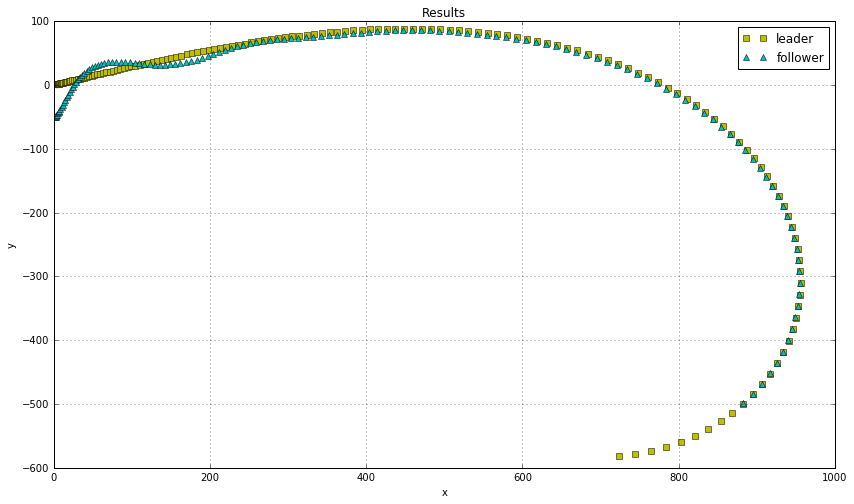

In [58]:
t = np.linspace(0,7,500)
f = 0.005

## predetermined input (for bot 1 i.e. leader bot)
u11 = 20
u12 = np.sin(2*np.pi*f*t)

## Initial conditions, x_10, y_10, theta_10.
initial_pose_1 = [5,2, np.pi/11.0]     # for leader
initial_pose_2 = [2,-50, np.pi/3.0]     # for follower

## Create the leader bot
leader = bot_unicycle(1, 1, initial_pose_1) # Leader bot

## Create the follower bot
## follower = bot_unicycle(1, 1, initial_pose_2) # Follower bot

## mark the initial positions on the plot
plt.plot(0,0,'rx')  ## Marking the origin

plt.plot(initial_pose_1[0],initial_pose_1[1],'ys',label='leader')  # Marking the leaders initial position
plt.plot(initial_pose_2[0],initial_pose_2[1],'c^', label='follower')  # Marking the followers initial position
##lets test rum them both

delta = 0.007    # Time difference between two successive events
heading = 0.0    # Initial heading for leader
v1 = [u11, 0.0]   # Input vector (first input is the forward velocity, second input is the angular velocity)
v2 = [0.0, 0.0]

k1 = 0.01
k2 = 0.001
k3 = 0.02

x1_bkp=[]
y1_bkp=[]
heading1_bkp=[]
v1_bkp=[]
## Begin the simulation
for i in range(150):
    x1, y1, heading1 = leader.step(i*delta, v1)
    #
    #x2, y2, heading2 = initial_pose_2
    if i>0:
        plt.plot(x1, y1, 'ys')
        
        
        x_ref, y_ref, head_ref = x1, y1, heading1
        
        x1_bkp.append(x_ref)
        y1_bkp.append(y_ref)
        heading1_bkp.append(head_ref)
        v1_bkp.append(v1)
        
        v1[1] = v1[1]-u12[i]*np.pi*(1.0/180.0)

        
## Reinitialization required due to singleton nature of odeint
follower = bot_unicycle(1, 1, initial_pose_2) # Follower bot

for i in range(140):
    x2, y2, heading2 = follower.step(i*delta, v2)
    if i>0:
        v1 = v1_bkp[i]
        x_ref, y_ref, head_ref = x1_bkp[i], y1_bkp[i], heading1_bkp[i]
        
        
        
        r_theta = np.matrix([[np.cos(head_ref), np.sin(head_ref)],[-np.sin(head_ref), np.cos(head_ref)]])
        pos_err = (r_theta * np.matrix([[x2-x_ref],[y2-y_ref]])).tolist()
        # print pos_err, pos_err[0], pos_err[1]
        theta_err =  heading2 - head_ref
        
        z1 = pos_err[0][0]
        z2 = pos_err[1][0]
        z3 = np.tan(theta_err)
        
        w1 = -k1 * abs(v1[0])*(z1 + z2*z3)  
        w2 = -(k2 * v1[0] * z2)  - (k3*abs(v1[0])*z3 )
        
        v2[0] = (w1 + v1[0])/np.cos(theta_err)
        v2[1] = (w2 + v1[1])*np.cos(theta_err)
        plt.plot(x2, y2, 'c^')

plt.title('Results')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
